In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [176]:
data = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/train.csv")
metadata = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/data_dictionary.csv")
test_data = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/test.csv")

Select only the 59 cols that are in test

In [177]:
data.head()

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT-PCIAT_20  \
0             50.8  ...             4.0             2.0             4.0   
1             46.0  ...             0.0             0.0             0.0   
2             75.6  ...             2.0             1.0             1.0   
3             81.6  ...             3.0             4.0             1.0   
4              NaN  ...             NaN             NaN             NaN   

   PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
0               55.0        NaN                NaN              NaN   
1                0.0       Fall               46.0             64.0   
2               28.0       Fall               38.0             54.0   
3               44.0     Summer               31.0             45.0   
4                NaN        NaN                NaN              NaN   

   PreInt_EduHx-Season PreInt_EduHx-computerinternet_hoursday  sii  
0                 Fall                                    3.0  2.0  
1               Summer                                    0.0  0.0  
2               Summer                                    2.0  0.0  
3               Winter                                    0.0  1.0  
4                  NaN                                    NaN  NaN  

[5 rows x 82 columns]

In [178]:
metadata.head()

Instrument                      Field  \
0                          Identifier                         id   
1                        Demographics  Basic_Demos-Enroll_Season   
2                        Demographics            Basic_Demos-Age   
3                        Demographics            Basic_Demos-Sex   
4  Children's Global Assessment Scale                CGAS-Season   

               Description             Type                        Values  \
0         Participant's ID              str                           NaN   
1     Season of enrollment              str  Spring, Summer, Fall, Winter   
2       Age of participant            float                           NaN   
3       Sex of participant  categorical int                           0,1   
4  Season of participation              str  Spring, Summer, Fall, Winter   

       Value Labels  
0               NaN  
1               NaN  
2               NaN  
3  0=Male, 1=Female  
4               NaN

In [179]:
data.describe()

Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
count      3960.000000      3960.000000      2421.000000   3022.000000   
mean         10.433586         0.372727        65.454771     19.331929   
std           3.574648         0.483591        22.341862      5.113934   
min           5.000000         0.000000        25.000000      0.000000   
25%           8.000000         0.000000        59.000000     15.869350   
50%          10.000000         0.000000        65.000000     17.937682   
75%          13.000000         1.000000        75.000000     21.571244   
max          22.000000         1.000000       999.000000     59.132048   

       Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
count      3027.000000      3076.000000                    898.000000   
mean         55.946713        89.038615                     27.278508   
std           7.473764        44.569040                      5.567287   
min          33.000000         0.000000                     18.000000   
25%          50.000000        57.200000                     23.000000   
50%          55.000000        77.000000                     26.000000   
75%          62.000000       113.800000                     30.000000   
max          78.500000       315.000000                     50.000000   

       Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  ...  \
count            2954.000000         2967.000000           2954.000000  ...   
mean               69.648951           81.597236            116.983074  ...   
std                13.611226           13.665196             17.061225  ...   
min                 0.000000           27.000000              0.000000  ...   
25%                61.000000           72.000000            107.000000  ...   
50%                68.000000           81.000000            114.000000  ...   
75%                76.000000           90.500000            125.000000  ...   
max               179.000000          138.000000            203.000000  ...   

       PCIAT-PCIAT_16  PCIAT-PCIAT_17  PCIAT-PCIAT_18  PCIAT-PCIAT_19  \
count     2728.000000     2725.000000     2728.000000     2730.000000   
mean         1.452346        1.627890        1.613636        1.158974   
std          1.495600        1.445622        1.529178        1.343661   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          1.000000        1.000000        1.000000        1.000000   
75%          2.000000        3.000000        2.000000        2.000000   
max          5.000000        5.000000        5.000000        5.000000   

       PCIAT-PCIAT_20  PCIAT-PCIAT_Total  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
count     2733.000000        2736.000000        2609.000000      2606.000000   
mean         0.943652          27.896199          41.088923        57.763622   
std          1.185460          20.338853          10.427433        13.196091   
min          0.000000           0.000000          17.000000        38.000000   
25%          0.000000          12.000000          33.000000        47.000000   
50%          1.000000          26.000000          39.000000        55.000000   
75%          1.000000          41.000000          46.000000        64.000000   
max          5.000000          93.000000          96.000000       100.000000   

       PreInt_EduHx-computerinternet_hoursday          sii  
count                             3301.000000  2736.000000  
mean                                 1.060588     0.580409  
std                                  1.094875     0.771122  
min                                  0.000000     0.000000  
25%                                  0.000000     0.000000  
50%                                  1.000000     0.000000  
75%                                  2.000000     1.000000  
max                                  3.000000     3.000000  

[8 rows x 70 columns]

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [181]:
cols_with_null = data.columns[data.count() < 3960]
data[cols_with_null]

CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  \
0         Winter             51.0            Fall     16.877316   
1            NaN              NaN            Fall     14.035590   
2           Fall             71.0            Fall     16.648696   
3           Fall             71.0          Summer     18.292347   
4         Summer              NaN             NaN           NaN   
...          ...              ...             ...           ...   
3955      Spring             60.0            Fall     16.362460   
3956         NaN              NaN          Spring     18.764678   
3957      Spring             68.0          Winter     21.441500   
3958      Spring             70.0          Winter     12.235895   
3959         NaN              NaN          Winter           NaN   

      Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
0                46.0             50.8                           NaN   
1                48.0             46.0                          22.0   
2                56.5             75.6                           NaN   
3                56.0             81.6                           NaN   
4                 NaN              NaN                           NaN   
...               ...              ...                           ...   
3955             59.5             82.4                           NaN   
3956             53.5             76.4                          27.0   
3957             60.0            109.8                           NaN   
3958             70.7             87.0                           NaN   
3959              NaN              NaN                           NaN   

      Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  ...  \
0                       NaN                 NaN                   NaN  ...   
1                      75.0                70.0                 122.0  ...   
2                      65.0                94.0                 117.0  ...   
3                      60.0                97.0                 117.0  ...   
4                       NaN                 NaN                   NaN  ...   
...                     ...                 ...                   ...  ...   
3955                   71.0                70.0                 104.0  ...   
3956                   60.0                78.0                 118.0  ...   
3957                   79.0                99.0                 116.0  ...   
3958                   59.0                61.0                 113.0  ...   
3959                    NaN                 NaN                   NaN  ...   

     PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT-PCIAT_20  PCIAT-PCIAT_Total  \
0               4.0             2.0             4.0               55.0   
1               0.0             0.0             0.0                0.0   
2               2.0             1.0             1.0               28.0   
3               3.0             4.0             1.0               44.0   
4               NaN             NaN             NaN                NaN   
...             ...             ...             ...                ...   
3955            1.0             1.0             0.0               32.0   
3956            NaN             NaN             NaN                NaN   
3957            1.0             0.0             1.0               31.0   
3958            1.0             1.0             1.0               19.0   
3959            NaN             NaN             NaN                NaN   

     SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  PreInt_EduHx-Season  \
0           NaN                NaN              NaN                 Fall   
1          Fall               46.0             64.0               Summer   
2          Fall               38.0             54.0               Summer   
3        Summer               31.0             45.0               Winter   
4           NaN                NaN              NaN                  NaN   
...         ...                ...              ...  

In [182]:
data1 = data.copy()
data1 = data.drop(['id'],axis=1)
for col in cols_with_null:
    if data1[col].dtype == 'object':
        data1[col] = data1[col].fillna('missing')
    else:
        data1[col] = data1[col].fillna(0)

In [183]:
data1.isnull().sum()

Basic_Demos-Enroll_Season                 0
Basic_Demos-Age                           0
Basic_Demos-Sex                           0
CGAS-Season                               0
CGAS-CGAS_Score                           0
                                         ..
SDS-SDS_Total_Raw                         0
SDS-SDS_Total_T                           0
PreInt_EduHx-Season                       0
PreInt_EduHx-computerinternet_hoursday    0
sii                                       0
Length: 81, dtype: int64

In [184]:
object_columns = data1.select_dtypes(include=['object'])
object_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Basic_Demos-Enroll_Season  3960 non-null   object
 1   CGAS-Season                3960 non-null   object
 2   Physical-Season            3960 non-null   object
 3   Fitness_Endurance-Season   3960 non-null   object
 4   FGC-Season                 3960 non-null   object
 5   BIA-Season                 3960 non-null   object
 6   PAQ_A-Season               3960 non-null   object
 7   PAQ_C-Season               3960 non-null   object
 8   PCIAT-Season               3960 non-null   object
 9   SDS-Season                 3960 non-null   object
 10  PreInt_EduHx-Season        3960 non-null   object
dtypes: object(11)
memory usage: 340.4+ KB


In [185]:
encoder = LabelEncoder()
for col in object_columns:
    data1[col] = encoder.fit_transform(data1[col])

In [186]:
data

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0     00008ff9                      Fall                5                0   
1     000fd460                    Summer                9                0   
2     00105258                    Summer               10                1   
3     00115b9f                    Winter                9                0   
4     0016bb22                    Spring               18                1   
...        ...                       ...              ...              ...   
3955  ff8a2de4                      Fall               13                0   
3956  ffa9794a                    Winter               10                0   
3957  ffcd4dbd                      Fall               11                0   
3958  ffed1dd5                    Spring               13                0   
3959  ffef538e                    Spring               11                0   

     CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  \
0         Winter             51.0            Fall     16.877316   
1            NaN              NaN            Fall     14.035590   
2           Fall             71.0            Fall     16.648696   
3           Fall             71.0          Summer     18.292347   
4         Summer              NaN             NaN           NaN   
...          ...              ...             ...           ...   
3955      Spring             60.0            Fall     16.362460   
3956         NaN              NaN          Spring     18.764678   
3957      Spring             68.0          Winter     21.441500   
3958      Spring             70.0          Winter     12.235895   
3959         NaN              NaN          Winter           NaN   

      Physical-Height  Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  \
0                46.0             50.8  ...             4.0             2.0   
1                48.0             46.0  ...             0.0             0.0   
2                56.5             75.6  ...             2.0             1.0   
3                56.0             81.6  ...             3.0             4.0   
4                 NaN              NaN  ...             NaN             NaN   
...               ...              ...  ...             ...             ...   
3955             59.5             82.4  ...             1.0             1.0   
3956             53.5             76.4  ...             NaN             NaN   
3957             60.0            109.8  ...             1.0             0.0   
3958             70.7             87.0  ...             1.0             1.0   
3959              NaN              NaN  ...             NaN             NaN   

      PCIAT-PCIAT_20  PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  \
0                4.0               55.0        NaN                NaN   
1                0.0                0.0       Fall               46.0   
2                1.0               28.0       Fall               38.0   
3                1.0               44.0     Summer               31.0   
4                NaN                NaN        NaN                NaN   
...              ...                ...        ...                ...   
3955             0.0               32.0     Winter               35.0   
3956             NaN                NaN        NaN                NaN   
3957             1.0               31.0     Winter               56.0   
3958             1.0               19.0     Spring               33.0   
3959             NaN                NaN        NaN                NaN   

      SDS-SDS_Total_T  PreInt_EduHx-Season  \
0                 NaN                 Fall   
1                64.0               Summer   
2                54.0               Summer   
3                45.0               Winter   
4                 NaN                  NaN   
...               ...                  ...   
3955             50.0                 Fall   
3956              NaN               Winter   
3957             77.0         

In [187]:
data1

Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0                             0                5                0   
1                             2                9                0   
2                             2               10                1   
3                             3                9                0   
4                             1               18                1   
...                         ...              ...              ...   
3955                          0               13                0   
3956                          3               10                0   
3957                          0               11                0   
3958                          1               13                0   
3959                          1               11                0   

      CGAS-Season  CGAS-CGAS_Score  Physical-Season  Physical-BMI  \
0               3             51.0                0     16.877316   
1               4              0.0                0     14.035590   
2               0             71.0                0     16.648696   
3               0             71.0                2     18.292347   
4               2              0.0                4      0.000000   
...           ...              ...              ...           ...   
3955            1             60.0                0     16.362460   
3956            4              0.0                1     18.764678   
3957            1             68.0                3     21.441500   
3958            1             70.0                3     12.235895   
3959            4              0.0                3      0.000000   

      Physical-Height  Physical-Weight  Physical-Waist_Circumference  ...  \
0                46.0             50.8                           0.0  ...   
1                48.0             46.0                          22.0  ...   
2                56.5             75.6                           0.0  ...   
3                56.0             81.6                           0.0  ...   
4                 0.0              0.0                           0.0  ...   
...               ...              ...                           ...  ...   
3955             59.5             82.4                           0.0  ...   
3956             53.5             76.4                          27.0  ...   
3957             60.0            109.8                           0.0  ...   
3958             70.7             87.0                           0.0  ...   
3959              0.0              0.0                           0.0  ...   

      PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT-PCIAT_20  PCIAT-PCIAT_Total  \
0                4.0             2.0             4.0               55.0   
1                0.0             0.0             0.0                0.0   
2                2.0             1.0             1.0               28.0   
3                3.0             4.0             1.0               44.0   
4                0.0             0.0             0.0                0.0   
...              ...             ...             ...                ...   
3955             1.0             1.0             0.0               32.0   
3956             0.0             0.0             0.0                0.0   
3957             1.0             0.0             1.0               31.0   
3958             1.0             1.0             1.0               19.0   
3959             0.0             0.0             0.0                0.0   

      SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  PreInt_EduHx-Season  \
0              4                0.0              0.0                    0   
1              0               46.0             64.0                    2   
2              0               38.0             54.0                    2   
3              2               31.0             45.0                    3   
4              4                0.0              0.0                    4   
...          ...                ...              ...        

In [188]:
train_cols = data1.drop('sii',axis=1)
train_label = data1['sii']

## REMOVE 20% vals or more of 2

([<matplotlib.patches.Wedge at 0x7fe148ba3190>,
 [Text(-0.6786020995254627, 0.8657362130115814, '2.0'),
  Text(0.36471863490334305, -1.0377766220888973, '0.0'),
  Text(1.0318593402478144, -0.3811381664742397, '1.0'),
  Text(1.0995998655241652, -0.029667081744556994, '3.0')],
 [Text(-0.37014659974116143, 0.4722197525517716, '71.2%'),
  Text(0.1989374372200053, -0.566059975684853, '18.4%'),
  Text(0.5628323674078988, -0.20789354534958526, '9.5%'),
  Text(0.5997817448313627, -0.01618204458794018, '0.9%')])

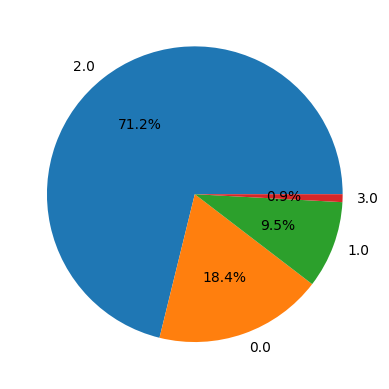

In [138]:
plt.pie(data1['sii'].value_counts(),labels=data1['sii'].unique(),autopct='%1.1f%%')

<Axes: >

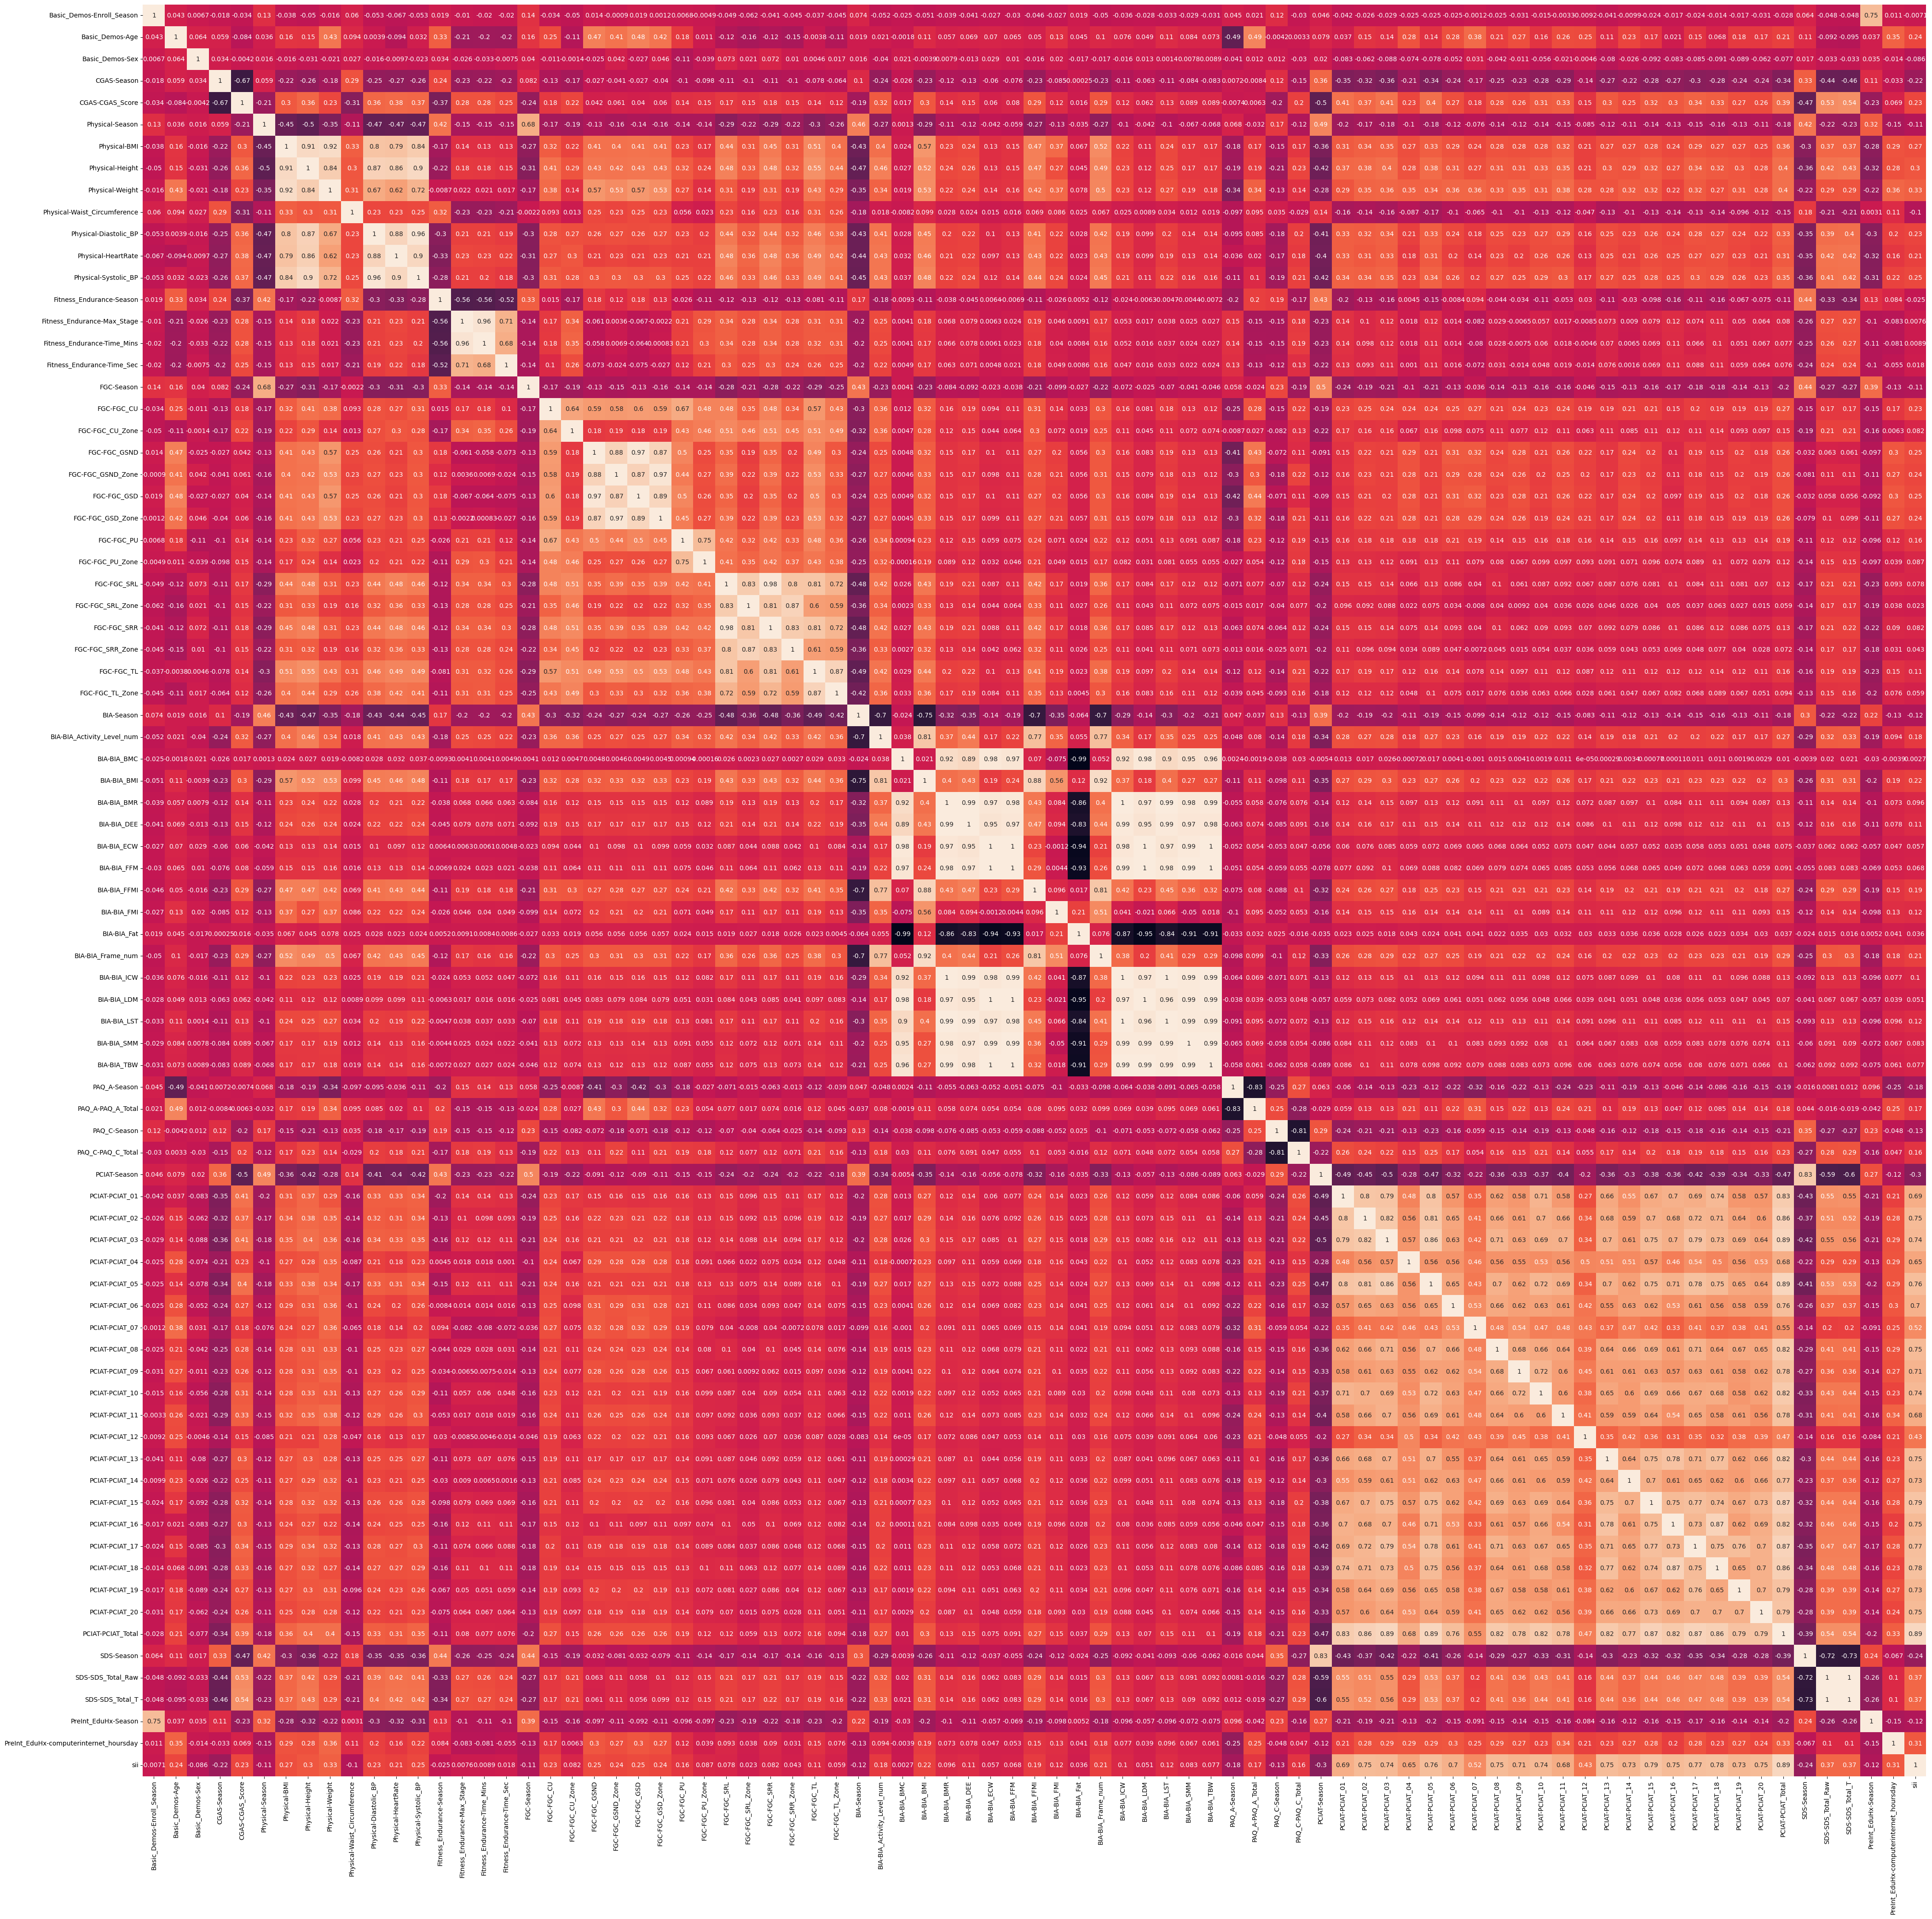

In [139]:
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(),annot=True,cbar=False)

In [196]:
cols_rm = list(set(train_cols.columns) - set(test_data.columns))
train_cols = train_cols.drop(cols_rm,axis=1)
train_cols

Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0                             0                5                0   
1                             2                9                0   
2                             2               10                1   
3                             3                9                0   
4                             1               18                1   
...                         ...              ...              ...   
3955                          0               13                0   
3956                          3               10                0   
3957                          0               11                0   
3958                          1               13                0   
3959                          1               11                0   

      CGAS-Season  CGAS-CGAS_Score  Physical-Season  Physical-BMI  \
0               3             51.0                0     16.877316   
1               4              0.0                0     14.035590   
2               0             71.0                0     16.648696   
3               0             71.0                2     18.292347   
4               2              0.0                4      0.000000   
...           ...              ...              ...           ...   
3955            1             60.0                0     16.362460   
3956            4              0.0                1     18.764678   
3957            1             68.0                3     21.441500   
3958            1             70.0                3     12.235895   
3959            4              0.0                3      0.000000   

      Physical-Height  Physical-Weight  Physical-Waist_Circumference  ...  \
0                46.0             50.8                           0.0  ...   
1                48.0             46.0                          22.0  ...   
2                56.5             75.6                           0.0  ...   
3                56.0             81.6                           0.0  ...   
4                 0.0              0.0                           0.0  ...   
...               ...              ...                           ...  ...   
3955             59.5             82.4                           0.0  ...   
3956             53.5             76.4                          27.0  ...   
3957             60.0            109.8                           0.0  ...   
3958             70.7             87.0                           0.0  ...   
3959              0.0              0.0                           0.0  ...   

      BIA-BIA_TBW  PAQ_A-Season  PAQ_A-PAQ_A_Total  PAQ_C-Season  \
0         32.6909             4               0.00             4   
1         27.0552             4               0.00             0   
2          0.0000             4               0.00             2   
3         45.9966             4               0.00             3   
4          0.0000             2               1.04             4   
...           ...           ...                ...           ...   
3955      52.8320             4               0.00             3   
3956       0.0000             4               0.00             3   
3957      54.4630             4               0.00             3   
3958      67.9038             4               0.00             1   
3959       0.0000             4               0.00             4   

      PAQ_C-PAQ_C_Total  SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
0                 0.000           4                0.0              0.0   
1                 2.340           0               46.0             64.0   
2                 2.170           0               38.0             54.0   
3                 2.451           2               31.0             45.0   
4                 0.000           4                0.0              0.0   
...                 ...         ...                ...              ...   
3955              3.260           3               35.0             50.0   
3956  

In [197]:
X = train_cols
y = train_label

In [198]:
X1 = X.copy()
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [199]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=42)

In [200]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3168, 58), (3168,), (792, 58), (792,))

In [205]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

Train Score 0.7373737373737373
Test Score 0.7196969696969697


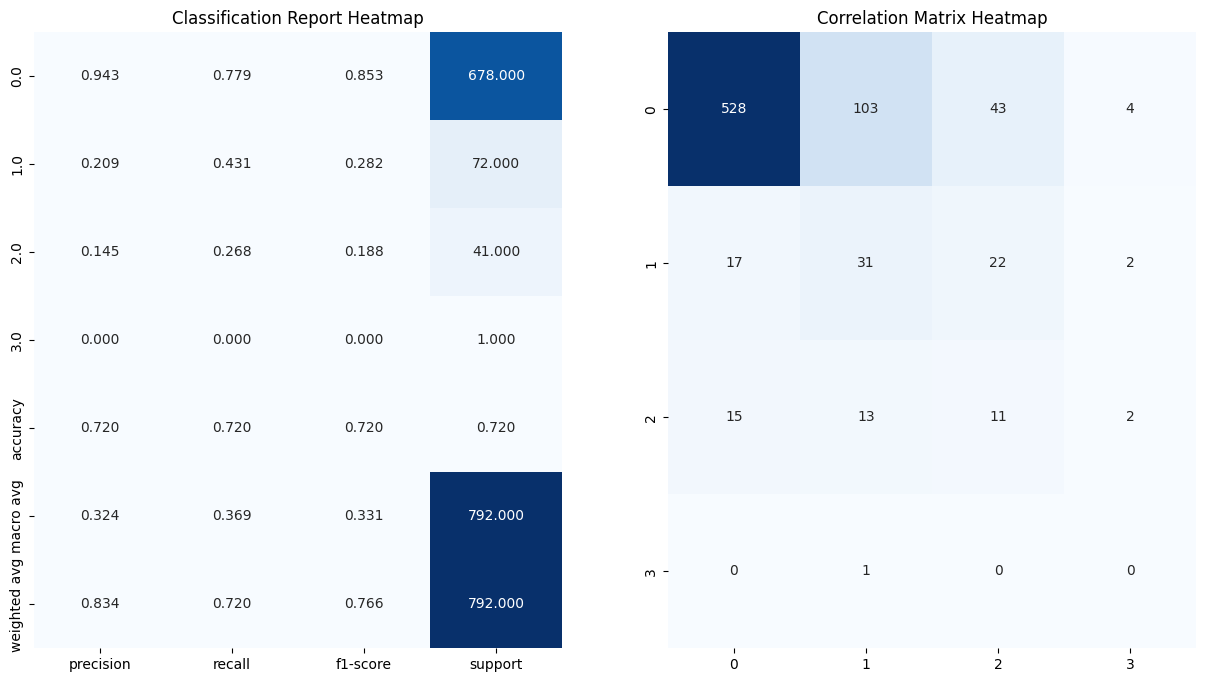

In [206]:
def metrics(model):
    preds = model.predict(X_test)
    print("Train Score",model.score(X_train,y_train))
    print("Test Score",accuracy_score(preds,y_test))
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))
    
    creport = pd.DataFrame(classification_report(preds,y_test,output_dict=True))
    sns.heatmap(creport.T,annot=True,linewidths=0,cmap='Blues',fmt='.3f',ax=axs[0],cbar=False)
    axs[0].set_title('Classification Report Heatmap')
    
    cm = confusion_matrix(preds,y_test)
    sns.heatmap(cm,annot=True,linewidths=0,cmap='Blues',fmt='.0f',ax=axs[1],cbar=False)
    axs[1].set_title('Correlation Matrix Heatmap')
metrics(logreg)

In [207]:
test_data.shape

(20, 59)

In [208]:
cols_with_null = {i:j for i,j in test_data.isnull().sum().to_dict().items() if j > 1}

In [209]:
test_data[cols_with_null.keys()]

CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  \
0       Winter             51.0            Fall     16.877316   
1          NaN              NaN            Fall     14.035590   
2         Fall             71.0            Fall     16.648696   
3         Fall             71.0          Summer     18.292347   
4       Summer              NaN             NaN           NaN   
5       Winter             50.0          Summer     22.279952   
6          NaN              NaN            Fall     19.660760   
7          NaN              NaN            Fall     16.861286   
8          NaN              NaN          Spring           NaN   
9       Summer              NaN             NaN           NaN   
10         NaN              NaN             NaN           NaN   
11      Summer             66.0             NaN           NaN   
12         NaN              NaN          Winter     21.079065   
13         NaN              NaN          Spring     15.544111   
14         NaN              NaN             NaN           NaN   
15      Summer             51.0          Spring     29.315775   
16      Summer             80.0          Spring     17.284504   
17         NaN              NaN            Fall     19.893157   
18      Spring             60.0          Winter     30.094649   
19         NaN              NaN             NaN           NaN   

    Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
0             46.00             50.8                           NaN   
1             48.00             46.0                          22.0   
2             56.50             75.6                           NaN   
3             56.00             81.6                           NaN   
4               NaN              NaN                           NaN   
5             59.50            112.2                           NaN   
6             55.00             84.6                           NaN   
7             59.25             84.2                          27.0   
8               NaN              NaN                           NaN   
9               NaN              NaN                           NaN   
10              NaN              NaN                           NaN   
11              NaN              NaN                           NaN   
12            57.75            100.0                           NaN   
13            60.00             79.6                          24.0   
14              NaN              NaN                           NaN   
15            54.00            121.6                           NaN   
16            44.00             47.6                           NaN   
17            55.00             85.6                          30.0   
18            37.50             60.2                          24.0   
19              NaN              NaN                           NaN   

    Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  ...  \
0                     NaN                 NaN                   NaN  ...   
1                    75.0                70.0                 122.0  ...   
2                    65.0                94.0                 117.0  ...   
3                    60.0                97.0                 117.0  ...   
4                     NaN                 NaN                   NaN  ...   
5                    60.0                73.0                 102.0  ...   
6                   123.0                83.0                 163.0  ...   
7                    71.0                90.0                 116.0  ...   
8                     NaN                 NaN                   NaN  ...   
9                     NaN                 NaN                   NaN  ...   
10                    NaN                 NaN                   NaN  ...   
11                    NaN                 NaN                   NaN  ...   
12                   63.0                79.0                 150.0  ...   
13                   57.0                71.0                 103.0  ...   
14                    NaN 

In [210]:
test_data1 = test_data.drop('id',axis=1)
for col in cols_with_null:
    if test_data1[col].dtype == 'object':
        test_data1[col] = test_data1[col].fillna('missing')
    else:
        test_data1[col] = data1[col].fillna(0)

In [211]:
test_data1

Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex CGAS-Season  \
0                       Fall                5                0      Winter   
1                     Summer                9                0     missing   
2                     Summer               10                1        Fall   
3                     Winter                9                0        Fall   
4                     Spring               18                1      Summer   
5                     Spring               13                1      Winter   
6                       Fall               10                0     missing   
7                       Fall               10                1     missing   
8                     Summer               15                0     missing   
9                     Summer               19                1      Summer   
10                    Spring               11                1     missing   
11                      Fall               11                0      Summer   
12                      Fall               13                0     missing   
13                    Spring               12                0     missing   
14                    Spring               12                0     missing   
15                    Winter                7                0      Summer   
16                    Spring                5                1      Summer   
17                      Fall               10                1     missing   
18                    Winter                6                0      Spring   
19                    Winter               10                0     missing   

    CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0              51.0            Fall     16.877316            46.00   
1               0.0            Fall     14.035590            48.00   
2              71.0            Fall     16.648696            56.50   
3              71.0          Summer     18.292347            56.00   
4               0.0         missing      0.000000             0.00   
5              50.0          Summer     22.279952            59.50   
6               0.0            Fall     19.660760            55.00   
7               0.0            Fall     16.861286            59.25   
8               0.0          Spring      0.000000             0.00   
9               0.0         missing      0.000000             0.00   
10              0.0         missing      0.000000             0.00   
11             66.0         missing      0.000000             0.00   
12              0.0          Winter     21.079065            57.75   
13              0.0          Spring     15.544111            60.00   
14              0.0         missing      0.000000             0.00   
15             51.0          Spring     29.315775            54.00   
16             80.0          Spring     17.284504            44.00   
17              0.0            Fall     19.893157            55.00   
18             60.0          Winter     30.094649            37.50   
19              0.0         missing      0.000000             0.00   

    Physical-Weight  Physical-Waist_Circumference  ...  BIA-BIA_TBW  \
0              50.8                           0.0  ...      32.6909   
1              46.0                          22.0  ...      27.0552   
2              75.6                           0.0  ...       0.0000   
3              81.6                           0.0  ...      45.9966   
4               0.0                           0.0  ...       0.0000   
5             112.2                           0.0  ...      63.1265   
6              84.6                           0.0  ...      47.2211   
7              84.2                          27.0  ...      50.4767   
8               0.0                           0.0  ...       0.0000   
9               0.0                           0.0  ...       0.0000   
10              0.0                           0.0  ...       0.0000   
11              0.0                      

In [212]:
object_columns = test_data1.select_dtypes(include=['object'])
object_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Basic_Demos-Enroll_Season  20 non-null     object
 1   CGAS-Season                20 non-null     object
 2   Physical-Season            20 non-null     object
 3   Fitness_Endurance-Season   20 non-null     object
 4   FGC-Season                 20 non-null     object
 5   BIA-Season                 20 non-null     object
 6   PAQ_A-Season               20 non-null     object
 7   PAQ_C-Season               20 non-null     object
 8   SDS-Season                 20 non-null     object
 9   PreInt_EduHx-Season        20 non-null     object
dtypes: object(10)
memory usage: 1.7+ KB


In [213]:
for col in object_columns:
   test_data1[col] = encoder.transform(test_data1[col])

In [214]:
missing_cols = set(X.columns) - set(test_data1.columns)

for col in missing_cols:
    test_data1[col] = 0

test_data1 = test_data1[X.columns]

In [215]:
test_data1 = test_data1[X.columns]

In [216]:
test_array = scaler.transform(test_data1)

In [217]:
predictions = logreg.predict(test_array)

In [223]:
submission_csv = pd.DataFrame({'id':test_data['id'],'sii':predictions})
submission_csv

id  sii
0   00008ff9    2
1   000fd460    0
2   00105258    0
3   00115b9f    1
4   0016bb22    0
5   001f3379    1
6   0038ba98    0
7   0068a485    0
8   0069fbed    0
9   0083e397    0
10  0087dd65    0
11  00abe655    0
12  00ae59c9    1
13  00af6387    0
14  00bd4359    0
15  00c0cd71    2
16  00d56d4b    0
17  00d9913d    0
18  00e6167c    0
19  00ebc35d    0

In [224]:
submission_csv.to_csv(index=False)

'id,sii\n00008ff9,2\n000fd460,0\n00105258,0\n00115b9f,1\n0016bb22,0\n001f3379,1\n0038ba98,0\n0068a485,0\n0069fbed,0\n0083e397,0\n0087dd65,0\n00abe655,0\n00ae59c9,1\n00af6387,0\n00bd4359,0\n00c0cd71,2\n00d56d4b,0\n00d9913d,0\n00e6167c,0\n00ebc35d,0\n'

In [225]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Train Score 1.0
Test Score 0.702020202020202


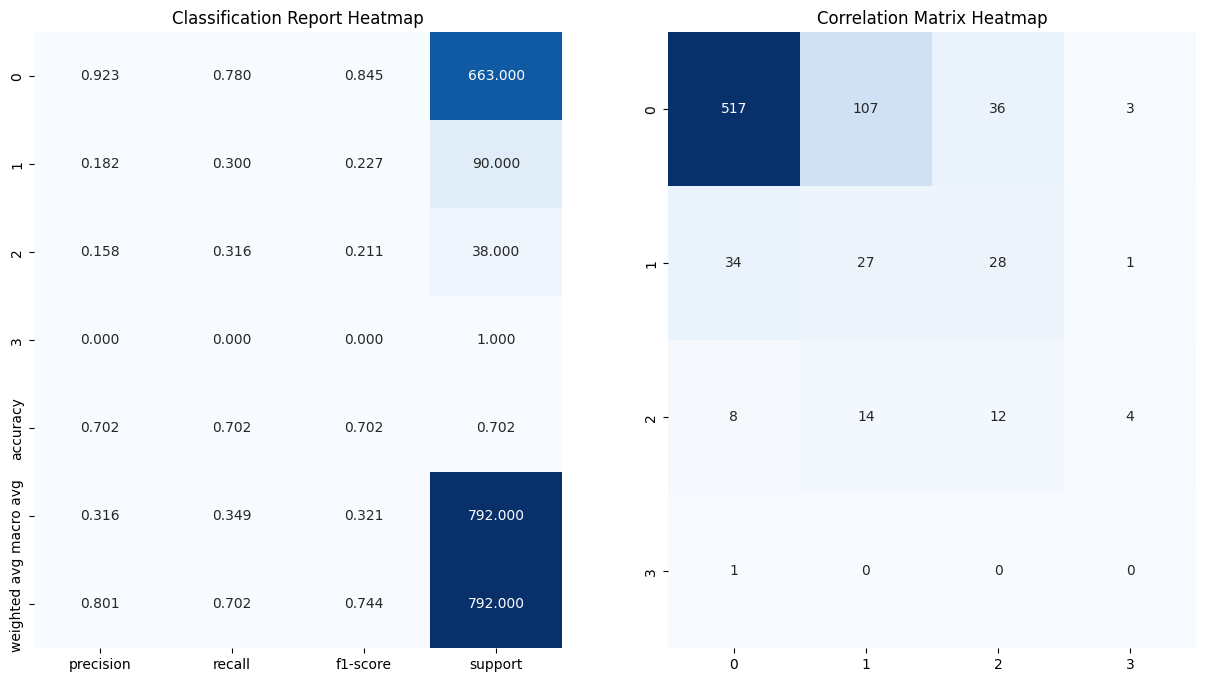

In [226]:
metrics(xgb)

In [222]:
xgb.predict(test_array)

array([2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0])